In [1]:
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import statsmodels.api as sm
from matplotlib import animation
from IPython.display import HTML
import matplotlib
from scipy.interpolate import interp1d
from scipy import interpolate
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [2]:
curvature_t_5_temp = np.load('curvature_trunc_4_old.npy')
s_t_5_temp = np.load('arclength_trunc_4_old.npy')
resi_s_5_temp = np.load('resipos_trunc_4_old.npy')
s_num = 1001
frame_start = 1000

curvature_t_5_old = curvature_t_5_temp[:,frame_start:]
s_t_5_old = s_t_5_temp[:,frame_start:]
resi_s_5_old = resi_s_5_temp[:,frame_start:]

In [3]:
curvature_t_5_temp = np.load('curvature_trunc_4.npy')
s_t_5_temp = np.load('arclength_trunc_4.npy')
resi_s_5_temp = np.load('resipos_trunc_4.npy')

In [4]:
s_num = 1001
frame_start = 500

curvature_t_5 = curvature_t_5_temp[:,frame_start:]
s_t_5 = s_t_5_temp[:,frame_start:]
resi_s_5 = resi_s_5_temp[:,frame_start:]

In [16]:
plt.rcParams['font.family'] = "Helvetica"
plt.rcParams['axes.linewidth'] = 4
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 4
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 4
#plt.rcParams['xtick.minor.size'] = 10
#plt.rcParams['xtick.minor.width'] = 2

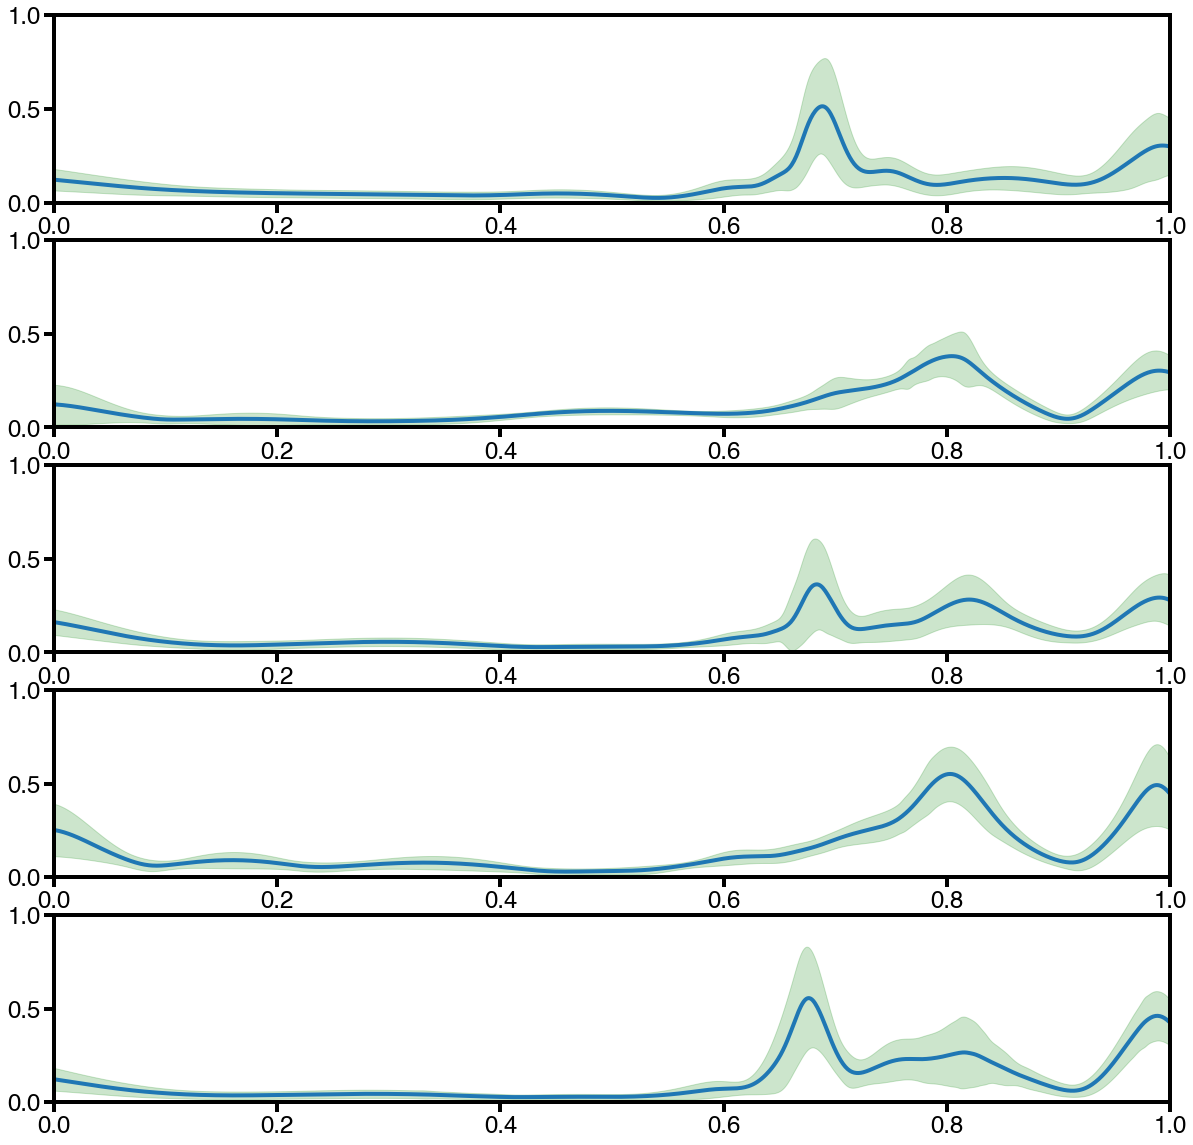

In [18]:
matplotlib.rcParams.update({'font.size': 22})

plt.figure(figsize=(20,20))
for i in range(5):
    plt.subplot(5,1,i+1)
    mean_curvature = np.average(curvature_t_5[i,np.max(curvature_t_5[i,:,:],axis=1) < 2,:], axis=0)
    fluc_curvature = np.std(curvature_t_5[i,np.max(curvature_t_5[i,:,:],axis=1) < 2,:], axis=0)
    plt.plot(np.linspace(0,1,s_num), mean_curvature,lw=4)
    plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
    #plt.plot(np.linspace(0,1,s_num), fluc_curvature/np.sqrt(800))
    #plt.plot([0,1],[0.12,0.12],'b--',lw=2)
    #plt.xlabel('relative arc length')
    #lt.ylabel('curvature (nm$^-1$)')
    plt.ylim([0,1])
    plt.xlim([0,1])
#plt.tight_layout()

In [20]:
np.sum(np.max(curvature_t_5[4,:,:],axis=1) > 2)

110

In [21]:
np.max(curvature_t_5[0,frame_start:,:],axis=1) > 0

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [22]:
np.shape(np.max(curvature_t_5[:,:,:],axis=1) < 2)

(5, 1001)

In [23]:
a = np.zeros((1,s_num))
for i in range (5):
    a = np.append(a, curvature_t_5[i,np.max(curvature_t_5[i,:,:],axis=1) < 2,:],axis=0)
a = np.delete(a,0,0)


(-0.0, 1.0)

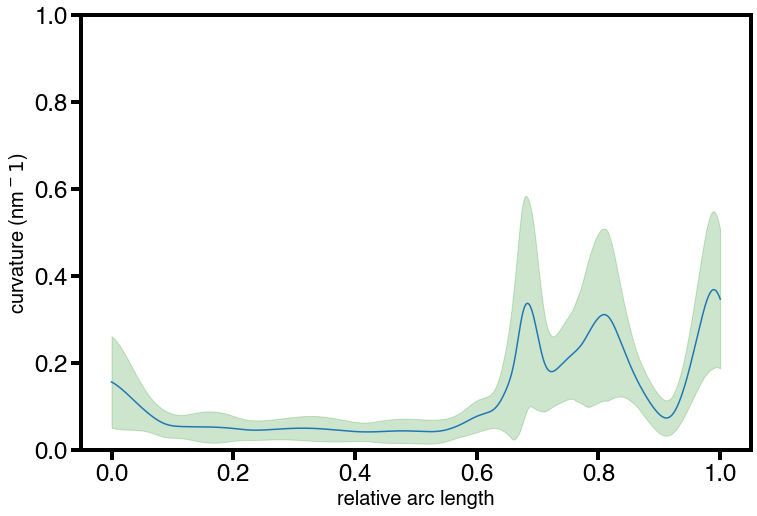

In [24]:
mean_curvature = np.average(a, axis=0)
fluc_curvature = np.std(a, axis=0)
plt.figure(figsize=(12,8))
plt.plot(np.linspace(0,1,s_num), mean_curvature)
plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
#plt.plot(np.linspace(0,1,s_num), fluc_curvature/np.sqrt(800))
#plt.plot([0,1],[0.12,0.12],'b--',lw=2)
plt.xlabel('relative arc length')
plt.ylabel('curvature (nm$^-1$)')
plt.ylim([-0.0,1.0])

In [25]:
from scipy.optimize import curve_fit
def gaus3(x,*args):
    a1,x1,sigma1,a2,x2,sigma2,a3,x3,sigma3,c = args
    return a1*np.exp(-(x-x1)**2/(2*sigma1**2)) + a2*np.exp(-(x-x2)**2/(2*sigma2**2)) + a3*np.exp(-(x-x3)**2/(2*sigma3**2)) + c
param_bounds=([0,0,0,0,0,0,0,0,0,0],[1,1,1,1,1,1,1,1,1,1])
popt,pcov = curve_fit(gaus3,np.linspace(0,1,s_num),mean_curvature,p0=[0.4,0.65,0.05,0.2,0.85,0.05,0.2,0.95,0.05,0.1],maxfev = 2000000,bounds=param_bounds)
popt

array([0.24966817, 0.68297328, 0.02328044, 0.24542122, 0.80165855,
       0.04749621, 0.30948602, 0.98895524, 0.02896433, 0.05874398])

In [26]:
# mapping to the residues
x1 = popt[1]; w1 = popt[2]
x2 = popt[4]; w2 = popt[5]
x3 = popt[7]; w3 = popt[8]

mean_res_pos = np.mean(resi_s_5 / s_t_5[:,:,-1][:,:,np.newaxis], axis=(0,1))
fac = 1
range1 = (x1 - fac*np.sqrt(-np.log(3/4)*2*w1**2), x1 + fac*np.sqrt(-np.log(3/4)*2*w1**2))
range2 = (x2 - fac*np.sqrt(-np.log(3/4)*2*w2**2), x2 + fac*np.sqrt(-np.log(3/4)*2*w2**2))
range3 = (x3 - fac*np.sqrt(-np.log(3/4)*2*w3**2), x3 + fac*np.sqrt(-np.log(3/4)*2*w3**2))


hinge1_resi = np.where((mean_res_pos > range1[0])&(mean_res_pos < range1[1]))[0]+912
hinge2_resi = np.where((mean_res_pos > range2[0])&(mean_res_pos < range2[1]))[0]+912
hinge3_resi = np.where((mean_res_pos > range3[0])&(mean_res_pos < range3[1]))[0]+912

(0.0, 0.8)

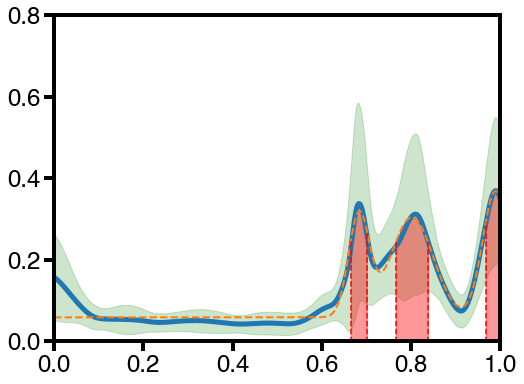

In [28]:
plt.figure(figsize=(8,6))
plt.plot(np.linspace(0,1,s_num), mean_curvature,linewidth=5)
plt.fill_between(np.linspace(0,1,s_num), mean_curvature-fluc_curvature, mean_curvature+fluc_curvature,color = 'g',alpha = 0.2)
plt.plot(np.linspace(0,1,s_num), gaus3(np.linspace(0,1,s_num), *popt),'--',linewidth=2)
plt.plot([range1[0],range1[0]],[-0.1,gaus3(range1[0], *popt)], 'r--')
plt.plot([range1[1],range1[1]],[-0.1,gaus3(range1[1], *popt)], 'r--')
plt.plot([range2[0],range2[0]],[-0.1,gaus3(range2[0], *popt)], 'r--')
plt.plot([range2[1],range2[1]],[-0.1,gaus3(range2[1], *popt)], 'r--')
plt.plot([range3[0],range3[0]],[-0.1,gaus3(range3[0], *popt)], 'r--')
plt.plot([range3[1],range3[1]],[-0.1,gaus3(range3[1], *popt)], 'r--')

plt.fill_between(np.linspace(range1[0],range1[1],s_num), np.zeros(s_num), gaus3(np.linspace(range1[0],range1[1],s_num),*popt),color = 'r',alpha = 0.4)
plt.fill_between(np.linspace(range2[0],range2[1],s_num), np.zeros(s_num), gaus3(np.linspace(range2[0],range2[1],s_num),*popt),color = 'r',alpha = 0.4)
plt.fill_between(np.linspace(range3[0],range3[1],s_num), np.zeros(s_num), gaus3(np.linspace(range3[0],range3[1],s_num),*popt),color = 'r',alpha = 0.4)

plt.xlim([0,1])
plt.ylim([0,0.8])

In [34]:
hinge1_resi

array([1084, 1085, 1086, 1087, 1088, 1091, 1092, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110,
       1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121,
       1122, 1123, 1124, 1125, 1127, 1130, 1131, 1132, 1133, 1134, 1135,
       1136, 1137, 1138])

In [35]:
hinge2_resi

array([1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166,
       1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177,
       1178])

In [36]:
hinge3_resi

array([1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213])

In [37]:
molecule = md.load('promb.gro')
top = molecule.top

table, bonds = top.to_dataframe()

table.loc[ table.chainID==0, 'resSeq'] = table['resSeq'][table.chainID==0].values + 815
table.loc[ table.chainID==1, 'resSeq'] = table['resSeq'][table.chainID==1].values + 815
table.loc[ table.chainID==2, 'resSeq'] = table['resSeq'][table.chainID==2].values + 815

table.loc[ table.chainID==3, 'resSeq'] = table['resSeq'][table.chainID==3].values + 685
table.loc[ table.chainID==4, 'resSeq'] = table['resSeq'][table.chainID==4].values + 685
table.loc[ table.chainID==5, 'resSeq'] = table['resSeq'][table.chainID==5].values + 685

In [38]:
start_loc = np.array([hinge1_resi[0], hinge2_resi[0], hinge3_resi[0]])
end_loc = np.array([hinge1_resi[-1], hinge2_resi[-1], hinge3_resi[-1]])
domain_name = ['hinge1','hinge2','hinge3']

table_protein = table[table['name']=='BB'][['serial','resSeq','resName','chainID']]

start_serial = np.zeros((3, len(start_loc)))
end_serial = np.zeros((3, len(start_loc)))
for i in range(len(start_loc)):
    start_serial[:,i] = table_protein[table_protein['resSeq']==start_loc[i]].values[:,0]
    end_serial[:,i] = table_protein[table_protein['resSeq']==end_loc[i]].values[:,0]

for i in range(len(start_loc)):
    print('name %s or name BB and fragment %d to %d %d to %d %d to %d'%(domain_name[i], start_serial[0,i], end_serial[0,i], start_serial[1,i], end_serial[1,i], start_serial[2,i], end_serial[2,i]))


name hinge1 or name BB and fragment 559 to 683 1546 to 1670 2533 to 2657
name hinge2 or name BB and fragment 727 to 773 1714 to 1760 2701 to 2747
name hinge3 or name BB and fragment 827 to 853 1814 to 1840 2801 to 2827
